In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
file_path = 'Financial-Market-News.csv'  # Ensure the correct file path
analysis = pd.read_csv(file_path, encoding="ISO-8859-1")

In [3]:
# Preprocess text data
def preprocess_text(text):
    text = str(text).lower()  # Lowercase conversion
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and non-alphanumeric characters
    return text

In [4]:
# Preprocess all news columns and combine them into a single text for each row
news = [' '.join([preprocess_text(analysis.iloc[i, col]) for col in range(2, 27)]) for i in range(len(analysis))]

In [5]:
# Feature extraction with TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)  # Using bigrams and increasing max features
X = vectorizer.fit_transform(news)

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, analysis['Label'], test_size=0.3, stratify=analysis['Label'], random_state=2529)

In [7]:
# Train Random Forest model with optimized hyperparameters
rf = RandomForestClassifier(n_estimators=1000, max_depth=30, random_state=2529, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=1000, n_jobs=-1,
                       random_state=2529)

In [8]:
# Evaluation
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.52
              precision    recall  f1-score   support

           0       0.48      0.20      0.28       581
           1       0.53      0.81      0.64       650

    accuracy                           0.52      1231
   macro avg       0.50      0.50      0.46      1231
weighted avg       0.51      0.52      0.47      1231



In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[116, 465],
       [126, 524]])

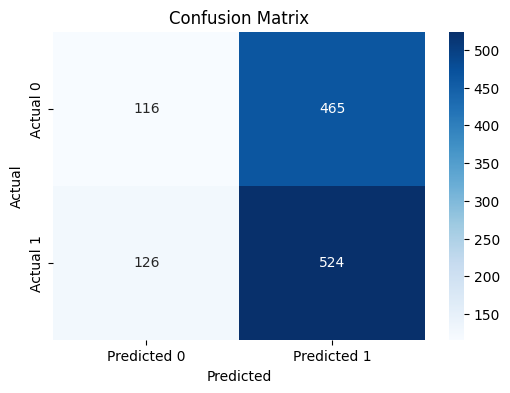

In [10]:
# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()